In [1]:
import tensorflow as tf
import keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [23]:
pip install Keras==2.2.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, shutil
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [3]:
# 1. Read the Data Set

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [5]:
# 2. Explore the dataset

In [6]:
#Question a
# How Many samples are there in train and test data
print('Train',x_train.shape,y_train.shape)
print('Test',x_test.shape,y_test.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


In [7]:
#Question b
# How many classes are there in train and test data and what are the classes

print('Numer of Class labels in this dataset',y_train[:,0])

Numer of Class labels in this dataset [6 9 9 ... 9 1 1]


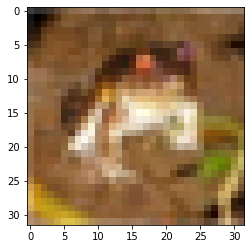

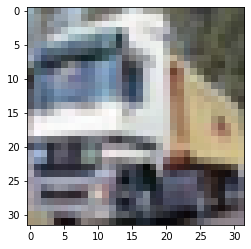

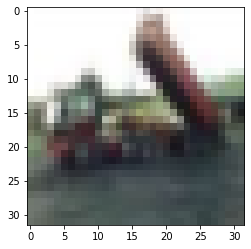

In [9]:
#Question C
# Display first three images

from keras.preprocessing import image
import matplotlib.pyplot as plt
num=[0,1,2]
for i in num:
    plt.imshow(x_train[i])
    plt.show()

In [10]:
#Question D
# Dispaly the first 100 lables 
lab_100=y_train[0:100]
print('First 100 lables are',lab_100)
if(lab_100.all()==lab_100[0]):
    print('Images are of same class')
else:
    print('=============================')
    print('Images are of Different class')

First 100 lables are [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]
 [6]
 [3]
 [5]
 [4]
 [0]
 [0]
 [9]
 [1]
 [3]
 [4]
 [0]
 [3]
 [7]
 [3]
 [3]
 [5]
 [2]
 [2]
 [7]
 [1]
 [1]
 [1]
 [2]
 [2]
 [0]
 [9]
 [5]
 [7]
 [9]
 [2]
 [2]
 [5]
 [2]
 [4]
 [3]
 [1]
 [1]
 [8]
 [2]
 [1]
 [1]
 [4]
 [9]
 [7]
 [8]
 [5]
 [9]
 [6]
 [7]
 [3]
 [1]
 [9]
 [0]
 [3]
 [1]
 [3]
 [5]
 [4]
 [5]
 [7]
 [7]
 [4]
 [7]
 [9]
 [4]
 [2]
 [3]
 [8]
 [0]
 [1]
 [6]
 [1]
 [1]
 [4]
 [1]]
Images are of Different class


In [11]:
# 3. Prepare the Data Set

In [12]:
# Question 3.a
# Split Train data into partial training and validation

from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(x_train,y_train,test_size=0.2)
print('Partial Splitting gave test train data as follows')
print('=================================================')
print('Partial train',X_train.shape)
print('Partial validation',X_valid.shape)

Partial Splitting gave test train data as follows
Partial train (40000, 32, 32, 3)
Partial validation (10000, 32, 32, 3)


In [13]:
# Question 3.b
# One Hot encoding for all sets
classes = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
## Normalization and then encoding
x_trainn = (x_train/255) - 0.5
x_testt = (x_test/255) - 0.5
y_trainn = keras.utils.to_categorical(y_train,classes)
y_testt = keras.utils.to_categorical(y_test,classes)

## New encoded labeles 
print ('Encoded Train lables shape',y_trainn.shape)
print ('Encodded Test labels shape',y_testt.shape)

Encoded Train lables shape (50000, 10)
Encodded Test labels shape (10000, 10)


In [14]:
# 4. Select, Train and Evaluate Model

In [39]:
# 4.a Simple CNN model as used for MNIST dataset
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras.layers.advanced_activations import LeakyReLU

def CNN_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu',input_shape = (32, 32, 3)))
    model.add(MaxPooling2D(pool_size = (2,2), strides = None,padding = 'valid',data_format = None))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, input_shape = (256, )))
    model.add(Dense(classes))
    model.add(LeakyReLU(0.1))
    model.add(Activation('softmax')) 
    return model
model=CNN_model()

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [34]:
model=CNN_model()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_trainn, y_trainn, epochs=10, batch_size=64)


Epoch 1/10
50000/50000 [==============================] - 143s 3ms/step - loss: 1.4709 - acc: 0.4779
Epoch 2/10
50000/50000 [==============================] - 139s 3ms/step - loss: 1.0440 - acc: 0.6341
Epoch 3/10
50000/50000 [==============================] - 139s 3ms/step - loss: 0.8841 - acc: 0.6924
Epoch 4/10
50000/50000 [==============================] - 138s 3ms/step - loss: 0.7963 - acc: 0.7228 3s - loss:
Epoch 5/10
50000/50000 [==============================] - 138s 3ms/step - loss: 0.7369 - acc: 0.7441
Epoch 6/10
50000/50000 [==============================] - 138s 3ms/step - loss: 0.6914 - acc: 0.7567
Epoch 7/10
50000/50000 [==============================] - 134s 3ms/step - loss: 0.6569 - acc: 0.7689
Epoch 8/10
50000/50000 [==============================] - 138s 3ms/step - loss: 0.6254 - acc: 0.7823
Epoch 9/10
50000/50000 [==============================] - 141s 3ms/step - loss: 0.5988 - acc: 0.7910
Epoch 10/10
50000/50000 [==============================] - 141s 3ms/step - loss:

In [72]:
# Question 4.b Pre-trained CNN Model
# I Implemented Resnet50 as Deep Neural Network Model
from keras import applications
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD, Adam

## Resent50 loaded

base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (32,32,3))
x = base_model.output
x=GlobalAveragePooling2D()(x)
predictions = Dense(10, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

## Model Compilation

model.compile(optimizer= Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting of Model on our data

model.fit(x_trainn, y_trainn, epochs = 5, batch_size = 64)

Epoch 1/5
 1280/50000 [..............................] - ETA: 1:15:11 - loss: 6.0004 - acc: 0.1070

KeyboardInterrupt: 

In [73]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [74]:
## Fine Tuning by freezing top model and leaving the last seven layers unfreez

for layer in base_model.layers[:-4]:
    layer.trainable= False
for layer in base_model.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000021E9052CC18> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000021E90542240> False
<keras.layers.convolutional.Conv2D object at 0x0000021E90542128> False
<keras.layers.normalization.BatchNormalization object at 0x0000021E905530B8> False
<keras.layers.core.Activation object at 0x0000021E90553080> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000021E90542438> False
<keras.layers.pooling.MaxPooling2D object at 0x0000021E90651438> False
<keras.layers.convolutional.Conv2D object at 0x0000021E9059D0B8> False
<keras.layers.normalization.BatchNormalization object at 0x0000021E4516D6A0> False
<keras.layers.core.Activation object at 0x0000021E4516DBE0> False
<keras.layers.convolutional.Conv2D object at 0x0000021E4518B8D0> False
<keras.layers.normalization.BatchNormalization object at 0x0000021E451BE6D8> False
<keras.layers.core.Activation object at 0x0000021E85E8CF60> False
<keras.layers.convolutional.Conv2D objec

In [78]:
base_model.layers[0].trainable=True
for layer in base_model.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000021E9052CC18> True
<keras.layers.convolutional.ZeroPadding2D object at 0x0000021E90542240> False
<keras.layers.convolutional.Conv2D object at 0x0000021E90542128> False
<keras.layers.normalization.BatchNormalization object at 0x0000021E905530B8> False
<keras.layers.core.Activation object at 0x0000021E90553080> False
<keras.layers.convolutional.ZeroPadding2D object at 0x0000021E90542438> False
<keras.layers.pooling.MaxPooling2D object at 0x0000021E90651438> False
<keras.layers.convolutional.Conv2D object at 0x0000021E9059D0B8> False
<keras.layers.normalization.BatchNormalization object at 0x0000021E4516D6A0> False
<keras.layers.core.Activation object at 0x0000021E4516DBE0> False
<keras.layers.convolutional.Conv2D object at 0x0000021E4518B8D0> False
<keras.layers.normalization.BatchNormalization object at 0x0000021E451BE6D8> False
<keras.layers.core.Activation object at 0x0000021E85E8CF60> False
<keras.layers.convolutional.Conv2D object

In [79]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [80]:
## Creat New Model by embedding new layers with Resnet50 modified model
model = Sequential([
  base_model,
  Flatten(),Dense(1024, activation='relu'),Dropout(0.5),
    Dense(10, activation='relu'), LeakyReLU(0.1),Activation('softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_16 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_23 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                10250     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
activation_301 (Activation)  (None, 10)                0         
Total para

In [81]:
# Training and Validation of Modified Resnet 50 Model

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer= Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting of Model on our data

model.fit(x_trainn, y_trainn, epochs = 10, batch_size = 64)

Epoch 1/10
50000/50000 [==============================] - 315s 6ms/step - loss: 2.3151 - acc: 0.0999
Epoch 2/10
10240/50000 [=====>........................] - ETA: 4:06 - loss: 2.3026 - acc: 0.0996

KeyboardInterrupt: 